<a href="https://colab.research.google.com/github/Dewwbe/Deep-Learning-Lab---05/blob/main/IT22910790Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# LSTM — Stock Price Prediction (IT22910790)

**Objective:** Implement an LSTM model to predict stock prices using historical data.

## Instructions
1. Ensure that `google.csv` is uploaded in the **root/content** directory.  
2. This notebook is renamed as `IT22910790.ipynb`.  
3. Modify:
   - Number of **units** in the LSTM layer(s)
   - Add more layers or change **dropout** rate
   - Tune **epochs** and **batch_size**  
4. Examine the plot of **Predicted vs Actual** stock prices.  
5. If inaccurate, experiment with configurations and training parameters.  
6. Answer the **questions at the end** in the provided markdown cell.


In [5]:

# === Setup ===
# If you're on Colab, uncomment the line below:
# !pip install -q tensorflow matplotlib pandas scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
df = pd.read_csv("/content/GOOG.csv")
print("Data shape:", df.shape)
df.head()


Data shape: (251, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-27,141.585495,142.500000,140.500000,141.501007,141.501007,18844000
1,2021-09-28,139.088501,139.606506,135.699997,136.184006,136.184006,42190000
2,2021-09-29,137.109695,137.398499,134.250000,134.520996,134.520996,26338000
3,2021-09-30,134.324997,135.589996,133.000000,133.265503,133.265503,35294000
4,2021-10-01,133.554504,137.070999,133.377502,136.462494,136.462494,28388000


In [6]:
# === Preprocessing ===
# We'll use 'Close' prices
close_data = df['Close'].values.reshape(-1, 1)

# Normalize prices to range [0, 1]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_data)

def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

WINDOW_SIZE = 60
X, y = create_sequences(scaled_data, WINDOW_SIZE)

# Reshape for LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train/test split (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((152, 60, 1), (152,), (39, 60, 1), (39,))

In [7]:

# === LSTM Model ===
UNITS = 50       # Try: 32, 50, 100
DROPOUT = 0.2    # Try: 0.2, 0.3, 0.5
EPOCHS = 20      # Try: 20, 50, 100
BATCH_SIZE = 32  # Try: 16, 32, 64

model = Sequential([
    LSTM(UNITS, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(DROPOUT),
    LSTM(UNITS, return_sequences=False),
    Dropout(DROPOUT),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.2339 - val_loss: 0.0145
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0325 - val_loss: 0.0384
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0283 - val_loss: 0.0138
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0193 - val_loss: 0.0127
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0218 - val_loss: 0.0192
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0157 - val_loss: 0.0249
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0193 - val_loss: 0.0158
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0170 - val_loss: 0.0136
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0156 - val_loss: 0.0140
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0163 - val_loss: 0.0156
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0152 - val_loss: 0.0129
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0123 - val_loss: 0.0114
Epoch 1

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step


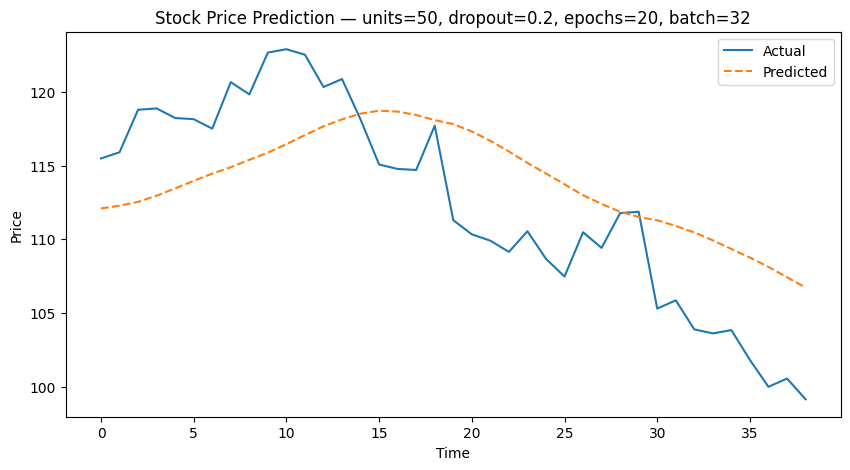

Root Mean Squared Error: 5.212021416996775


In [8]:

# === Predictions ===
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))

actual_prices = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.plot(actual_prices, label="Actual")
plt.plot(predictions, label="Predicted", linestyle="--")
plt.title(f"Stock Price Prediction — units={UNITS}, dropout={DROPOUT}, epochs={EPOCHS}, batch={BATCH_SIZE}")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(actual_prices, predictions))
print("Root Mean Squared Error:", rmse)



## Questions & Answers

**1. What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?**  
Normalization scales values into a fixed range (e.g., [0,1]), which helps the LSTM train faster and more stably. Without normalization, large raw prices could lead to unstable gradients and poor convergence.

**2. What is the purpose of the Dropout layer in the LSTM model?**  
Dropout randomly "turns off" some neurons during training, preventing overfitting and improving generalization by forcing the model to not rely on specific neurons.

**3. In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?**  
It means the model has learned meaningful temporal patterns from historical data and is able to generalize well to unseen test data, making accurate predictions.
